In [1]:
import pandas as pd
import numpy as np
import glob 
import os 
from pandas import DataFrame as df
from os import listdir


## Merging all data and Concatenating to one csv file 


In [2]:
path = r"C:\Users\meett\Documents\Projects\Sales_Data"
df1 = []
file_names = glob.glob(path + '/*.csv')
for file in file_names:
    df1.append(pd.read_csv(file))
all_data = pd.concat(df1,ignore_index=True)
all_data.to_csv('all_sales_data.csv',index=False)

#### All NaN values are removed from the dataframelistdir

In [3]:
months_data = pd.read_csv('all_sales_data.csv').dropna(how= 'all')

In [4]:
months_data.sort_index(axis = 0,ascending=True, inplace=True)

In [5]:
months_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### augmenting additional columns to the dataframe

##### 1. We need an addtional column for months

In [6]:
months_data[['Months','Day, Year & Time']]=months_data['Order Date'].str.split('/',n=1,expand=True)

##### Removing all NaN values specifically from 'Months' column

In [7]:
months_data.dropna(subset=['Months'],inplace=True)
months_data.dropna(how='any',inplace=True)

##### casting columns to different dtypes

In [8]:
months_data['Months'] = pd.to_numeric(months_data['Months'],errors ='coerce')
months_data['Months'] = months_data['Months'].astype(int)
months_data['Quantity Ordered'] = months_data['Quantity Ordered'].astype(int)

In [9]:
months_data['Sales'] = 'NaN'
months_data['Price Each'] = pd.to_numeric(months_data['Price Each'],errors='coerce')

In [10]:
months_data['Sales'] = months_data['Quantity Ordered'] * months_data['Price Each']

In [11]:
months_data = months_data.reindex(columns= ['Order ID', 'Product', 'Quantity Ordered','Price Each','Sales','Months' ,'Order Date',
       'Purchase Address', 'Day, Year & Time'],copy=True)

#### Question 1 : What was the best month for sales? How much was earned in that month?


###### We can find the sales of every month by using groupby method

In [12]:
months_data.groupby('Months').sum()['Sales']

Months
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

##### December had most number of sales and january had the least

##### Now plotting sales on the graph


In [13]:
import matplotlib.pyplot as plt

In [14]:
results = months_data.groupby('Months').sum()

Text(0, 0.5, 'Sales in US dollars')

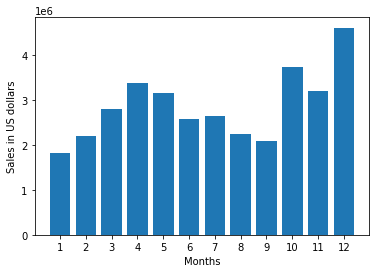

In [15]:
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xlabel('Months')
plt.xticks(ticks= months)
plt.ylabel('Sales in US dollars')

In [16]:
months_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Months,Order Date,Purchase Address,"Day, Year & Time"
0,176558,USB-C Charging Cable,2,11.95,23.90,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19/19 08:46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",07/19 22:30
3,176560,Google Phone,1,600.00,600.00,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12/19 14:38


In [17]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

months_data['City'] = months_data['Purchase Address'].apply(lambda x : f"{get_city(x)} {get_state(x)}")

In [18]:
months_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Months,Order Date,Purchase Address,"Day, Year & Time",City
0,176558,USB-C Charging Cable,2,11.95,23.90,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19/19 08:46,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",07/19 22:30,Boston MA


##### A more concise syntax can also be used by either creating a function or by using lambda with apply method.
 
 
    

In [19]:
#For example def get_city(address):
                    #return address.split(',').get(1)
    #months_data['Purchase Address'].apply(lambda x : get_city(x))
    
                        #OR

#months_data['Purchase Address'].apply(lambda x : x.split(',')[1])

#### Question 2: which city has the highest number of sales?

In [20]:
months_data.groupby('City').sum()['Sales']

City
 Atlanta GA          2795498.58
 Austin TX           1819581.75
 Boston MA           3661642.01
 Dallas TX           2767975.40
 Los Angeles CA      5452570.80
 New York City NY    4664317.43
 Portland ME          449758.27
 Portland OR         1870732.34
 San Francisco CA    8262203.91
 Seattle WA          2747755.48
Name: Sales, dtype: float64

In [21]:
result_2 = months_data.groupby('City').sum('Sales')

In [22]:
result_2['Sales']


City
 Atlanta GA          2795498.58
 Austin TX           1819581.75
 Boston MA           3661642.01
 Dallas TX           2767975.40
 Los Angeles CA      5452570.80
 New York City NY    4664317.43
 Portland ME          449758.27
 Portland OR         1870732.34
 San Francisco CA    8262203.91
 Seattle WA          2747755.48
Name: Sales, dtype: float64

In [23]:
months_data['City']

0                 Dallas TX
2                 Boston MA
3            Los Angeles CA
4            Los Angeles CA
5            Los Angeles CA
                ...        
186845       Los Angeles CA
186846     San Francisco CA
186847     San Francisco CA
186848     San Francisco CA
186849     San Francisco CA
Name: City, Length: 185950, dtype: object

In [24]:
months_data['City'].unique()

array([' Dallas TX', ' Boston MA', ' Los Angeles CA', ' San Francisco CA',
       ' Seattle WA', ' Atlanta GA', ' New York City NY', ' Portland OR',
       ' Austin TX', ' Portland ME'], dtype=object)

In [25]:
cities = [city for city, state in months_data.groupby('City')] # list comprehension

In [26]:
result_2 = months_data.groupby('City').sum('Sales')

##### Question 3: what time should we display advertisements to maximize the likelihood of customer's buying products?

In [27]:
months_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Months,Order Date,Purchase Address,"Day, Year & Time",City
0,176558,USB-C Charging Cable,2,11.95,23.90,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19/19 08:46,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",07/19 22:30,Boston MA


In [28]:
months_data.reset_index().head(2)

,index,Order ID,Product,Quantity Ordered,Price Each,Sales,Months,Order Date,Purchase Address,"Day, Year & Time",City
0,0,176558,USB-C Charging Cable,2,11.95,23.90,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19/19 08:46,Dallas TX
1,2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",07/19 22:30,Boston MA


In [29]:
months_data['Order Date'] = pd.to_datetime(months_data['Order Date'])

In [30]:
months_data = months_data.reset_index()

In [31]:
months_data.head(3)

,index,Order ID,Product,Quantity Ordered,Price Each,Sales,Months,Order Date,Purchase Address,"Day, Year & Time",City
0,0,176558,USB-C Charging Cable,2,11.95,23.90,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19/19 08:46,Dallas TX
1,2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",07/19 22:30,Boston MA
2,3,176560,Google Phone,1,600.00,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12/19 14:38,Los Angeles CA


#### Question 3: what time should we display advertisements to maximize the likelihood of customers buying products?

In [33]:
import datetime as dt

In [34]:
months_data['Hours'] = months_data['Order Date'].dt.hour

In [35]:
months_data.head(2)

,index,Order ID,Product,Quantity Ordered,Price Each,Sales,Months,Order Date,Purchase Address,"Day, Year & Time",City,Hours
0,0,176558,USB-C Charging Cable,2,11.95,23.90,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19/19 08:46,Dallas TX,8
1,2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",07/19 22:30,Boston MA,22


In [36]:
Orders = months_data.groupby('Hours')['Product'].count()

In [37]:
hours = [hour for hour, minute in months_data.groupby('Hours')]

' Most of the order placements occured in around 12pm and 7pm respectively. So, maybe these two times could be most favourable\nfor displaying adverstisements '

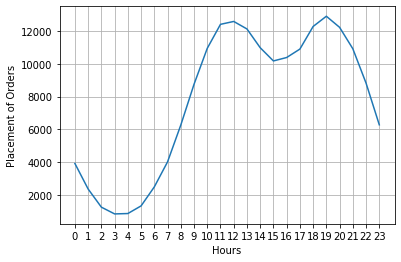

In [38]:
plt.plot(hours, Orders)
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Placement of Orders')

""" Most of the order placements occured in around 12pm and 7pm respectively. So, maybe these two times could be most favourable
for displaying adverstisements """ 


#### Question 4: What products are often sold together?

In [39]:
# We need to know the time at which the sale of the products occured.
# To do this, we have to cast object ['Product'] to category as column ['Product'] has only 19 'n' unique values.

In [40]:
months_data['Product'] = months_data['Product'].astype('category')

In [41]:
months_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Sales,Months,Order Date,Purchase Address,"Day, Year & Time",City,Hours
0,0,176558,USB-C Charging Cable,2,11.95,23.90,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19/19 08:46,Dallas TX,8
1,2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",07/19 22:30,Boston MA,22
2,3,176560,Google Phone,1,600.00,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12/19 14:38,Los Angeles CA,14
3,4,176560,Wired Headphones,1,11.99,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12/19 14:38,Los Angeles CA,14
4,5,176561,Wired Headphones,1,11.99,11.99,4,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",30/19 09:27,Los Angeles CA,9


In [42]:
# we will get to know the number of rows having duplicate values after calling duplicated method on the dataframe.


In [43]:
months_data['Duplicate values'] = months_data.duplicated(subset =['Order ID','Order Date'],keep= False)

In [44]:
"""So we now have a new column named 'Duplicated values' showing boolean values of True and False"""

"So we now have a new column named 'Duplicated values' showing boolean values of True and False"

In [45]:
months_data.head(4)

,index,Order ID,Product,Quantity Ordered,Price Each,Sales,Months,Order Date,Purchase Address,"Day, Year & Time",City,Hours,Duplicate values
0,0,176558,USB-C Charging Cable,2,11.95,23.90,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19/19 08:46,Dallas TX,8,False
1,2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",07/19 22:30,Boston MA,22,False
2,3,176560,Google Phone,1,600.00,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12/19 14:38,Los Angeles CA,14,True
3,4,176560,Wired Headphones,1,11.99,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12/19 14:38,Los Angeles CA,14,True


In [46]:
months_data['Grouped'] = months_data.groupby(['Order ID'])['Product'].transform(lambda x : ','.join(x))

In [50]:
from itertools import combinations
from collections import Counter

In [60]:
""" I have gone through some post on stackoverflow site and got to know the use of Counter subclass of dict to count frequency of values of a list """

' I have gone through some post on stackoverflow site and got to know the use of Counter subclass of dict to count frequency of values of a list '

In [56]:
count = Counter()

for values in months_data['Grouped']:
    row_list = values.split(',')
    count.update(Counter(combinations(row_list,2)))

In [63]:
count.most_common(5)

[(('iPhone', 'Lightning Charging Cable'), 2140),
 (('Google Phone', 'USB-C Charging Cable'), 2116),
 (('iPhone', 'Wired Headphones'), 987),
 (('Google Phone', 'Wired Headphones'), 949),
 (('iPhone', 'Apple Airpods Headphones'), 799)]

#### Question 5: Which product sold the most ? Why do you think it sold the most?

In [158]:
months_data.head(3)

,index,Order ID,Product,Quantity Ordered,Price Each,Sales,Months,Order Date,Purchase Address,"Day, Year & Time",City,Hours,Duplicate values,Grouped
0,0,176558,USB-C Charging Cable,2,11.95,23.90,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19/19 08:46,Dallas TX,8,False,USB-C Charging Cable
1,2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",07/19 22:30,Boston MA,22,False,Bose SoundSport Headphones
2,3,176560,Google Phone,1,600.00,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12/19 14:38,Los Angeles CA,14,True,"Google Phone,Wired Headphones"


In [159]:
prod_ordered = months_data.groupby('Product')

In [160]:
quantity_ordered = prod_ordered.sum()['Quantity Ordered']
products = [product for product, df in prod_ordered]

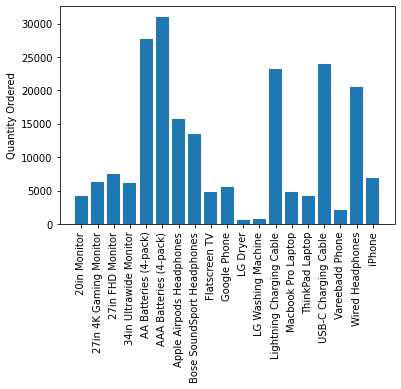

In [161]:
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation= 'vertical',size=10)
plt.ylabel('Quantity Ordered')
plt.show()

In [162]:
months_data.groupby('Product').sum()['Quantity Ordered']

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [163]:
"""By plotting the graph and also grouping products by counting their quantity ordered explicitly illustrate that 'AAA Batteries' was ordered more by the customers"""


"By plotting the graph and also grouping products by counting their quantity ordered explicitly illustrate that 'AAA Batteries' was ordered more by the customers"

In [169]:
"""and the least ordered product identified to be LG Dryer"""

'and the least ordered product identified to be LG Dryer'

##### Determing if prices of the products are correlated with quantity ordered

In [170]:
price  = months_data.groupby('Product').mean()['Price Each']

C:\Users\meett\AppData\Local\Temp\ipykernel_24900\997992156.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=10)


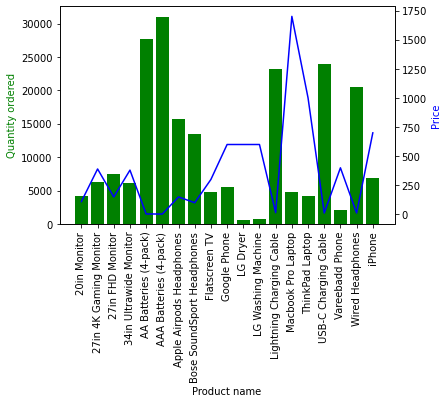

In [175]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products, price, 'b-')

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products,rotation='vertical',size=10)
plt.show()
